In [27]:
#importing required Library 

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt



import sklearn

from sklearn.model_selection import train_test_split

In [29]:
adv=pd.read_csv("https://raw.githubusercontent.com/thanhvotran/MLforHDRs/main/advertising.csv")



In [4]:
adv.head()



,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<Axes: xlabel='TV', ylabel='Sales'>

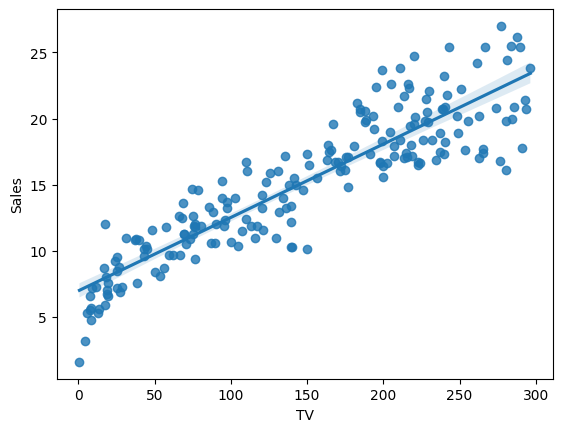

In [6]:
sns.regplot(x='TV', y='Sales', data=adv)



Model Building 
Steps:

Create X and y

Create Train and Test sets(70-30, 80-20) 

Training the model on training set (i.e. learn the coefficient) 

Evaluate the model ( Training set, test set) 

In [7]:
X=adv['TV']

y=adv['Sales']

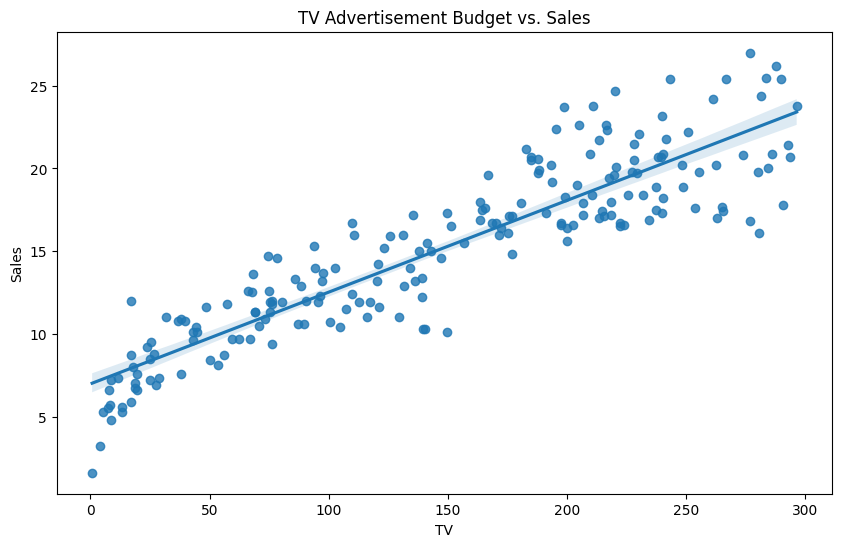

In [8]:
# 2. Data Visualization
# Let's start by visualizing the relationship between the 'TV' advertising budget and 'Sales'. This will give us an idea of the linear relationship between the two variables.

plt.figure(figsize=(10,6))
sns.regplot(x='TV', y='Sales', data=adv)
plt.title('TV Advertisement Budget vs. Sales')
plt.show()


In [12]:
# 3. Simple Linear Regression Model Building using sklearn
# Here, we'll use sklearn to train a simple linear regression model.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting data into train and test sets
X = adv[['TV']]  # Predictor variable
y = adv['Sales']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)


In [14]:
# 4. Model Evaluation
# We'll use R^2 (coefficient of determination) and RMSE (Root Mean Squared Error) to evaluate the performance of our model.
# Calculating R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.2f}")

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")


R^2 Score: 0.80
Root Mean Squared Error: 2.47


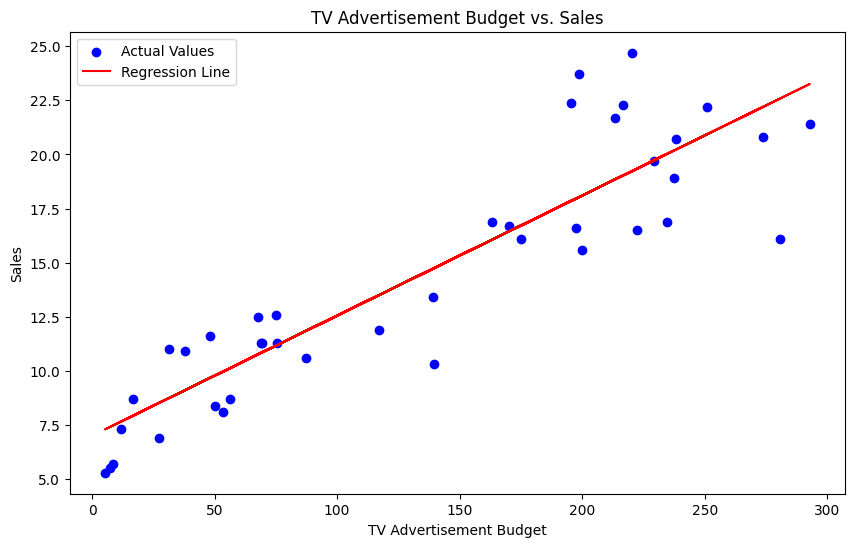

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('TV Advertisement Budget vs. Sales')
plt.xlabel('TV Advertisement Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()


# Exercise 1: Multiple Linear Regression
# Question: Using the given dataset, build a multiple linear regression model with 'TV', 'Radio', and 'Newspaper' as predictors and 'Sales' as the target variable. Evaluate the model using R^2 and RMSE.


In [18]:

# Splitting data
X = adv[['TV', 'Radio', 'Newspaper']]
y = adv['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
mlr = LinearRegression()

# Fit the model
mlr.fit(X_train, y_train)

# Predict on the test set
y_pred = mlr.predict(X_test)

# Calculating R^2 and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R^2 Score: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


R^2 Score: 0.91
Root Mean Squared Error: 1.71


# Exercise 2: Residual Analysis
# Question: Plot the residuals (difference between actual and predicted values) for the multiple linear regression model built in Exercise 1. What do you observe?

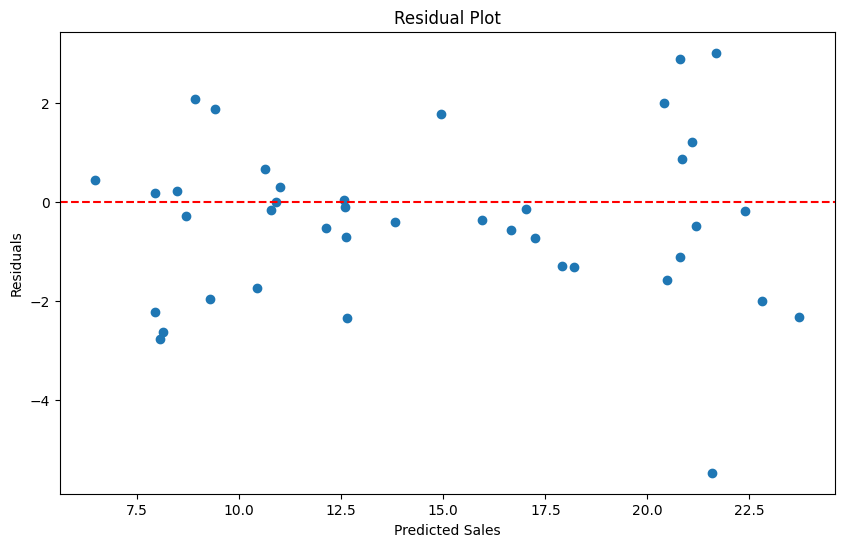

In [19]:
# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.show()

# If residuals are randomly scattered around the horizontal axis, it indicates a good fit. Any patterns may suggest the model is missing some information.



# Exercise 3: Correlation Analysis
# Question: Calculate and plot the correlation matrix for the given dataset. Which variables are strongly correlated with 'Sales'?



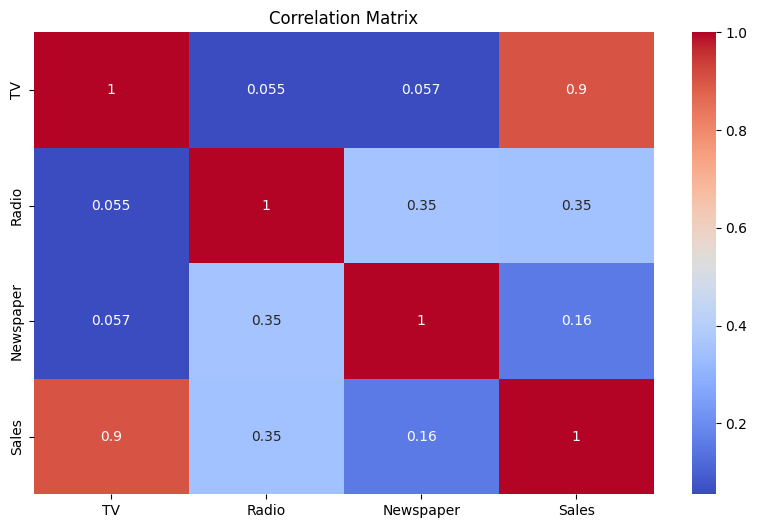

In [20]:
correlation_matrix = adv.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# The heatmap will show the strength and direction of the linear relationship between variables. Values closer to 1 or -1 indicate a strong correlation.



In [ ]:
# Exercise 4: Feature Importance
# Question: Using the coefficients from the multiple linear regression model in Exercise 1, determine the importance of each feature ('TV', 'Radio', 'Newspaper') in predicting 'Sales'.

In [21]:
coefficients = mlr.coef_
features = ['TV', 'Radio', 'Newspaper']

for coef, feature in zip(coefficients, features):
    print(f"Coefficient for {feature}: {coef:.2f}")


# The magnitude and sign of coefficients indicate the importance and direction of the relationship between each feature and the target variable, respectively.




Coefficient for TV: 0.05
Coefficient for Radio: 0.10
Coefficient for Newspaper: 0.00


# Unsupervised Learning, K-Mean Clustering 

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(adv[['TV', 'Radio', 'Newspaper']])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
adv['Cluster'] = kmeans.fit_predict(X_scaled)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


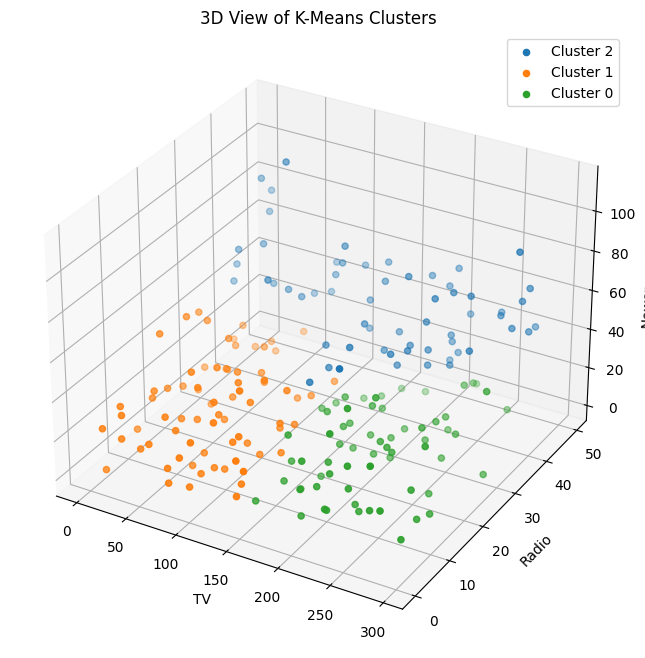

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Plotting each cluster
for cluster in adv['Cluster'].unique():
    cluster_data = adv[adv['Cluster'] == cluster]
    ax.scatter(cluster_data['TV'], cluster_data['Radio'], cluster_data['Newspaper'], label=f'Cluster {cluster}')

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Newspaper')
ax.legend()
ax.set_title('3D View of K-Means Clusters')
plt.show()






This 3D scatter plot visualizes 

how the data points are clustered based on their advertisement spendings in TV, Radio, and Newspaper. 


Each cluster can represent a different strategy or group of advertisement spending.

The clusters can be interpreted as:

Cluster 0: Ad strategies that focus moderately on all three mediums.

Cluster 1: Ad strategies that majorly focus on TV advertising.

Cluster 2: Ad strategies with lower budgets across all mediums.